In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_90148/2611001789.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', quality=100)


In [75]:
# read and clean
my_data = pd.read_csv("Mendeley.csv")
df = my_data.iloc[:,2:]
df_copy = df.copy()
df_copy = df_copy.drop(df_copy.index[df_copy['CLASS'] == "P"])

# then convert Male and Female to 1 and 0 through level, Class to be 1(Yes), 0(No), and get rid of P(predictice)
cleanup_nums = {"Gender":{"M": 1, "F": 0}, "CLASS":{"Y":1, "N":0 }}

# implement the replacing
df_copy = df_copy.replace(cleanup_nums)
df_copy

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1


In [76]:
from sklearn.model_selection import train_test_split
X = df_copy.iloc[:,0:11].to_numpy()
y = df_copy.iloc[:,11].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [77]:
# Implement models and compare
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

hungry_model_ls = [SVC(kernel="linear", probability = True), RandomForestClassifier(), LogisticRegression(max_iter=1000),KNeighborsClassifier()]
full_model_ls =[]
for model in hungry_model_ls:
    model.fit(X_train,y_train)
    full_model_ls.append(model)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"The accuracy {model} of  is {accuracy}")
    print(metrics.confusion_matrix(y_test, y_pred))

The accuracy SVC(kernel='linear', probability=True) of  is 0.9789029535864979
[[ 21   1]
 [  4 211]]
The accuracy RandomForestClassifier() of  is 0.9957805907172996
[[ 21   1]
 [  0 215]]
The accuracy LogisticRegression(max_iter=1000) of  is 0.9873417721518988
[[ 21   1]
 [  2 213]]
The accuracy KNeighborsClassifier() of  is 0.9282700421940928
[[ 11  11]
 [  6 209]]


In [78]:
# ROC analysis
from sklearn.metrics import roc_curve, roc_auc_score

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])  # this is to create a result table
for model in hungry_model_ls:
    model.fit(X_train,y_train)
    full_model_ls.append(model)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)  # false positive and true positive
    auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({'classifiers':model.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)


/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_90148/265507876.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':model.__class__.__name__,
/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_90148/265507876.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':model.__class__.__name__,
/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_90148/265507876.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':model.__class__.__name__,
/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_90148/265507876.py:11: FutureWarning: The frame.append method 

/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_90148/3351217687.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', quality=100)


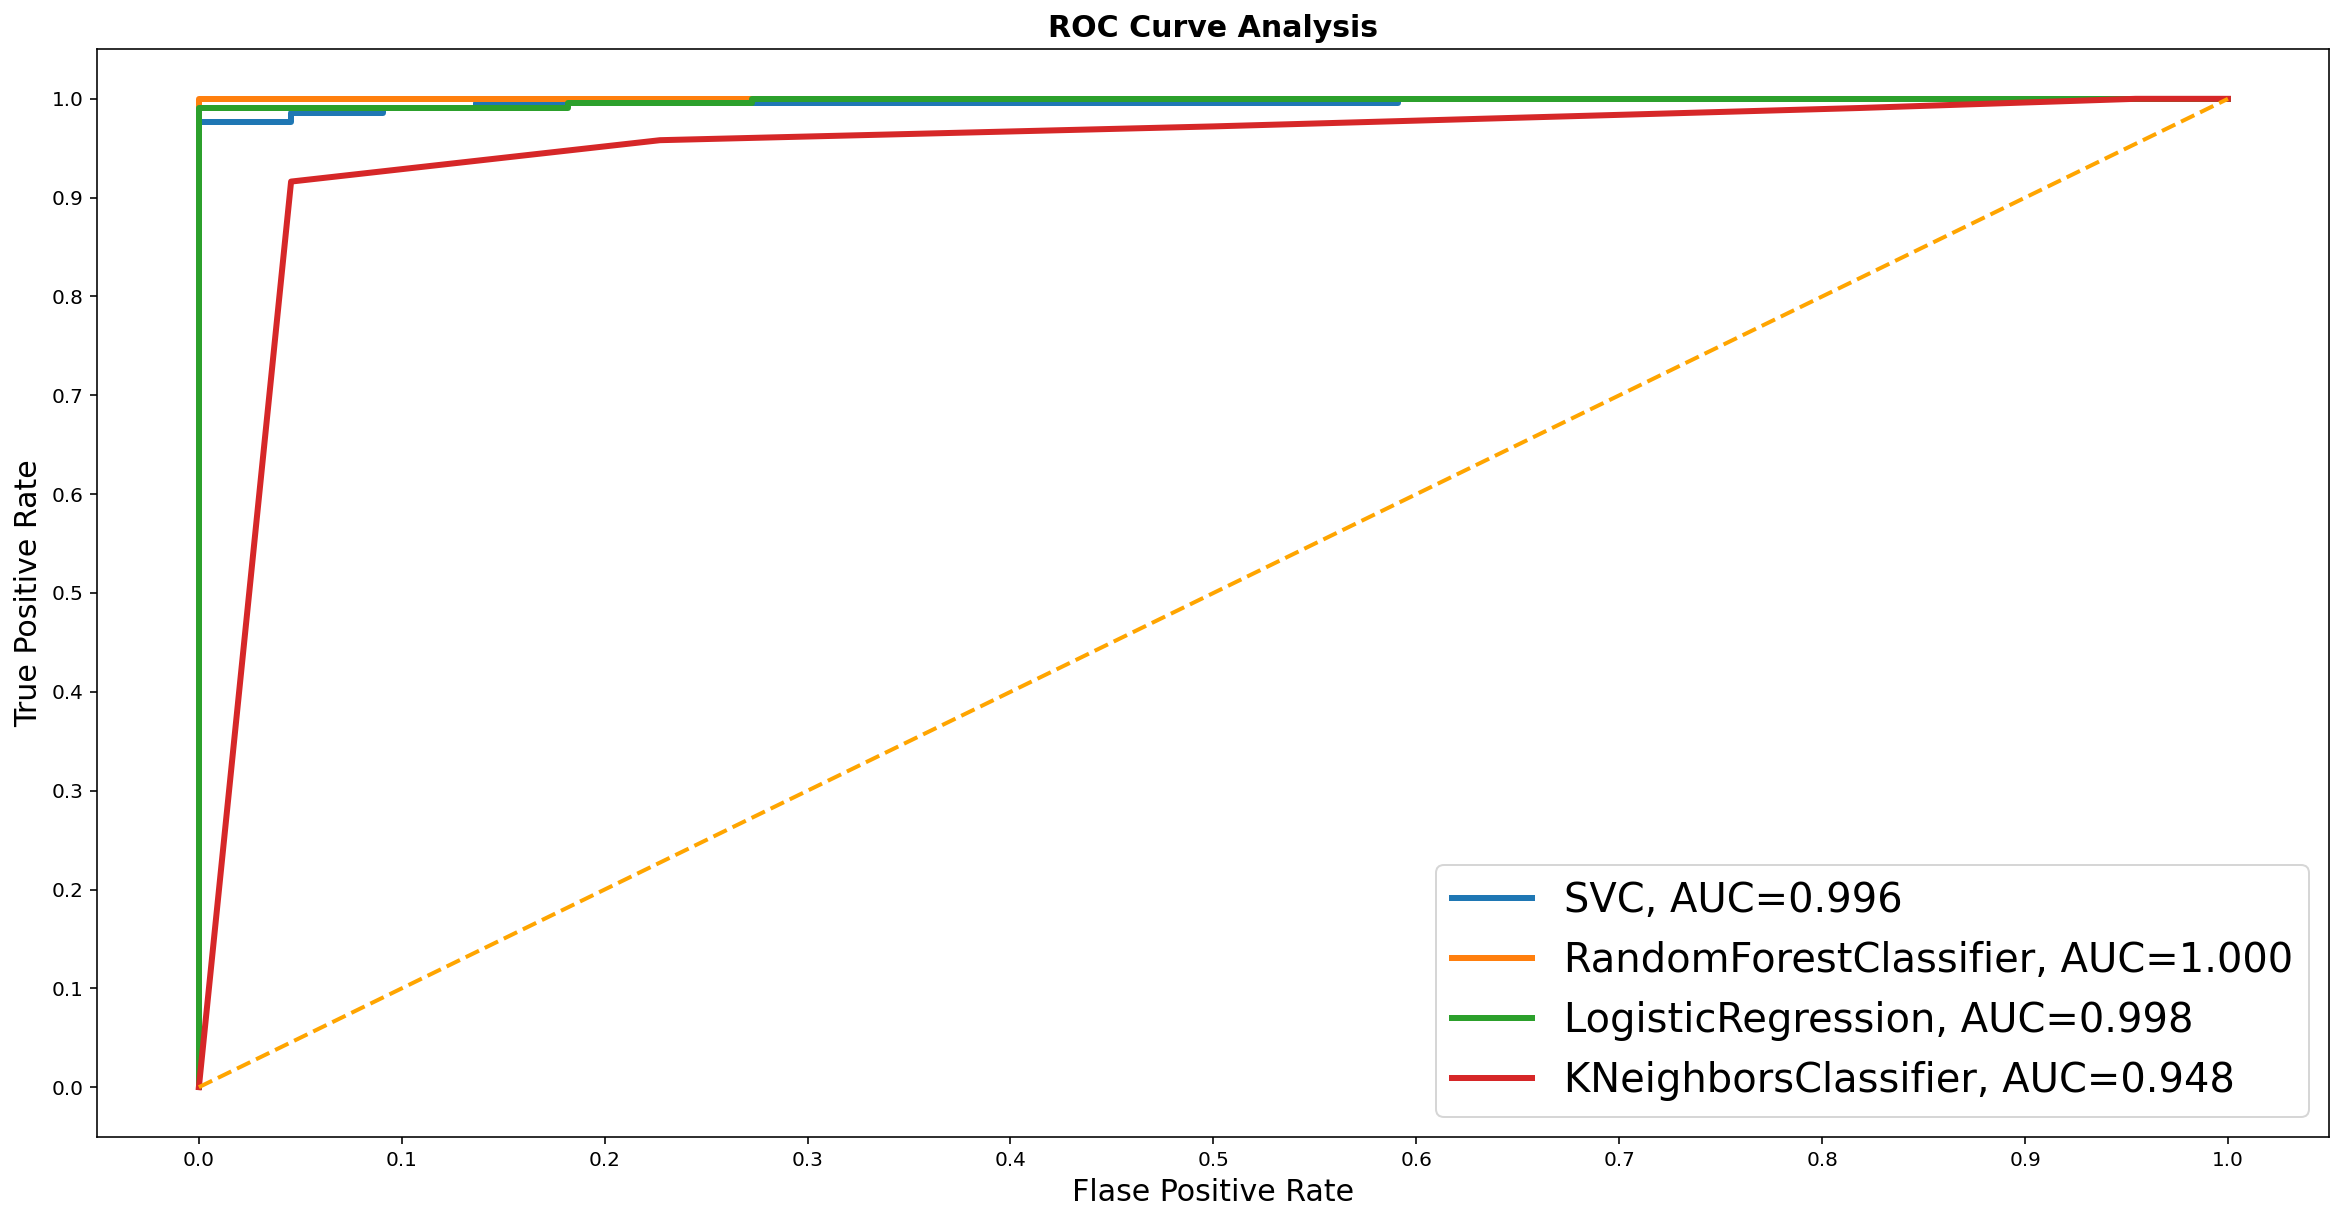

In [79]:
fig = plt.figure(figsize=(20,10))
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']), linewidth=3)

plt.plot([0,1], [0,1], color='orange', linestyle='--', linewidth = 2)

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':20}, loc='lower right')
plt.show()

In [80]:
# test our model on external database
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
diabetes = pd.read_csv(url, delim_whitespace=True)
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [81]:
# wash the the external database so it fits to our model
cleanup_nums = {"SEX":{1: 0, 2: 1}} # change male to 0 and female to 1
diabetes_copy = diabetes.replace(cleanup_nums)
testdata = diabetes_copy[["AGE","SEX","BMI"]]
ourdata = df_copy[["AGE", "Gender", "BMI","CLASS"]]
ourdata.head()

,AGE,Gender,BMI,CLASS
0,50,0,24.0,0
1,26,1,23.0,0
2,50,0,24.0,0
3,50,0,24.0,0
4,33,1,21.0,0


In [82]:
X = ourdata.iloc[:,0:3].to_numpy()
y = ourdata.iloc[:,3].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [83]:
hungry_model_ls = [SVC(kernel="linear", probability = True), RandomForestClassifier(), LogisticRegression(max_iter=1000),KNeighborsClassifier()]
full_model_ls =[]
precision_our = []
for model in hungry_model_ls:
    model.fit(X_train,y_train)
    full_model_ls.append(model)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    precision = metrics.precision_score(y_test, y_pred)
    precision_our.append(metrics.precision_score(y_test, y_pred))
    print(f"The accuracy {model} of  is {accuracy}")
    print(f"The precision {model} of  is {precision}")
    print(metrics.confusion_matrix(y_test, y_pred))
precision_our = np.array(precision_our)

The accuracy SVC(kernel='linear', probability=True) of  is 0.9367088607594937
The precision SVC(kernel='linear', probability=True) of  is 0.9629629629629629
[[ 14   8]
 [  7 208]]
The accuracy RandomForestClassifier() of  is 0.9451476793248945
The precision RandomForestClassifier() of  is 0.963302752293578
[[ 14   8]
 [  5 210]]
The accuracy LogisticRegression(max_iter=1000) of  is 0.9324894514767933
The precision LogisticRegression(max_iter=1000) of  is 0.9502262443438914
[[ 11  11]
 [  5 210]]
The accuracy KNeighborsClassifier() of  is 0.9451476793248945
The precision KNeighborsClassifier() of  is 0.963302752293578
[[ 14   8]
 [  5 210]]


In [84]:
test_data = testdata.to_numpy()
precision_ls = []
for model in full_model_ls:
    y_pred = model.predict(test_data)
    precision = np.mean(y_pred == np.ones(len(test_data)) )  # all patients in test dataset are positive
    precision_ls.append(precision)
    print(f"the precision of {model} is {precision}")
precision_ls = np.array(precision_ls)

the precision of SVC(kernel='linear', probability=True) is 0.7330316742081447
the precision of RandomForestClassifier() is 0.7307692307692307
the precision of LogisticRegression(max_iter=1000) is 0.7873303167420814
the precision of KNeighborsClassifier() is 0.7805429864253394


Text(0.5, 0, 'Precision')

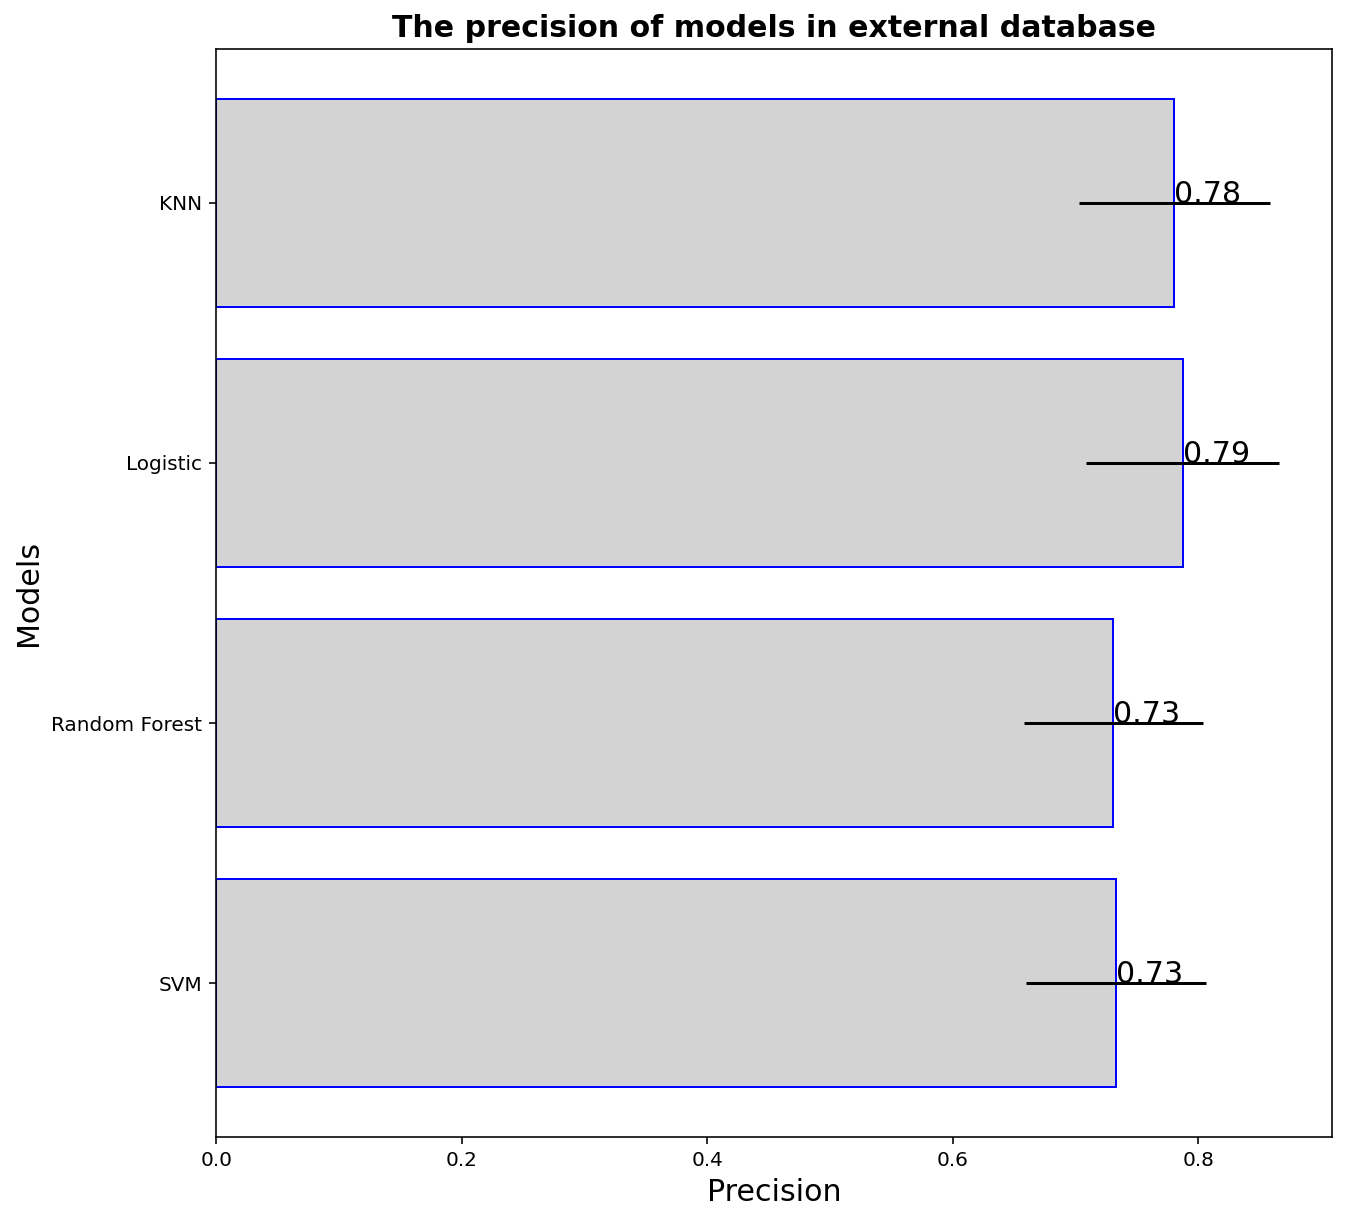

In [85]:
# bar plot
plt.figure(figsize=(10,10))
x = ["SVM", "Random Forest", "Logistic", "KNN"]
plt.barh(x,precision_ls, xerr=0.1*precision_ls, color = "lightgrey", edgecolor='blue')
for index, value in enumerate(precision_ls):
    plt.text(value, index,
             str(round(value, 2)), fontsize = 15)
plt.title("The precision of models in external database",fontweight='bold', fontsize=15)
plt.ylabel("Models", fontsize = 15)
plt.xlabel("Precision", fontsize = 15)

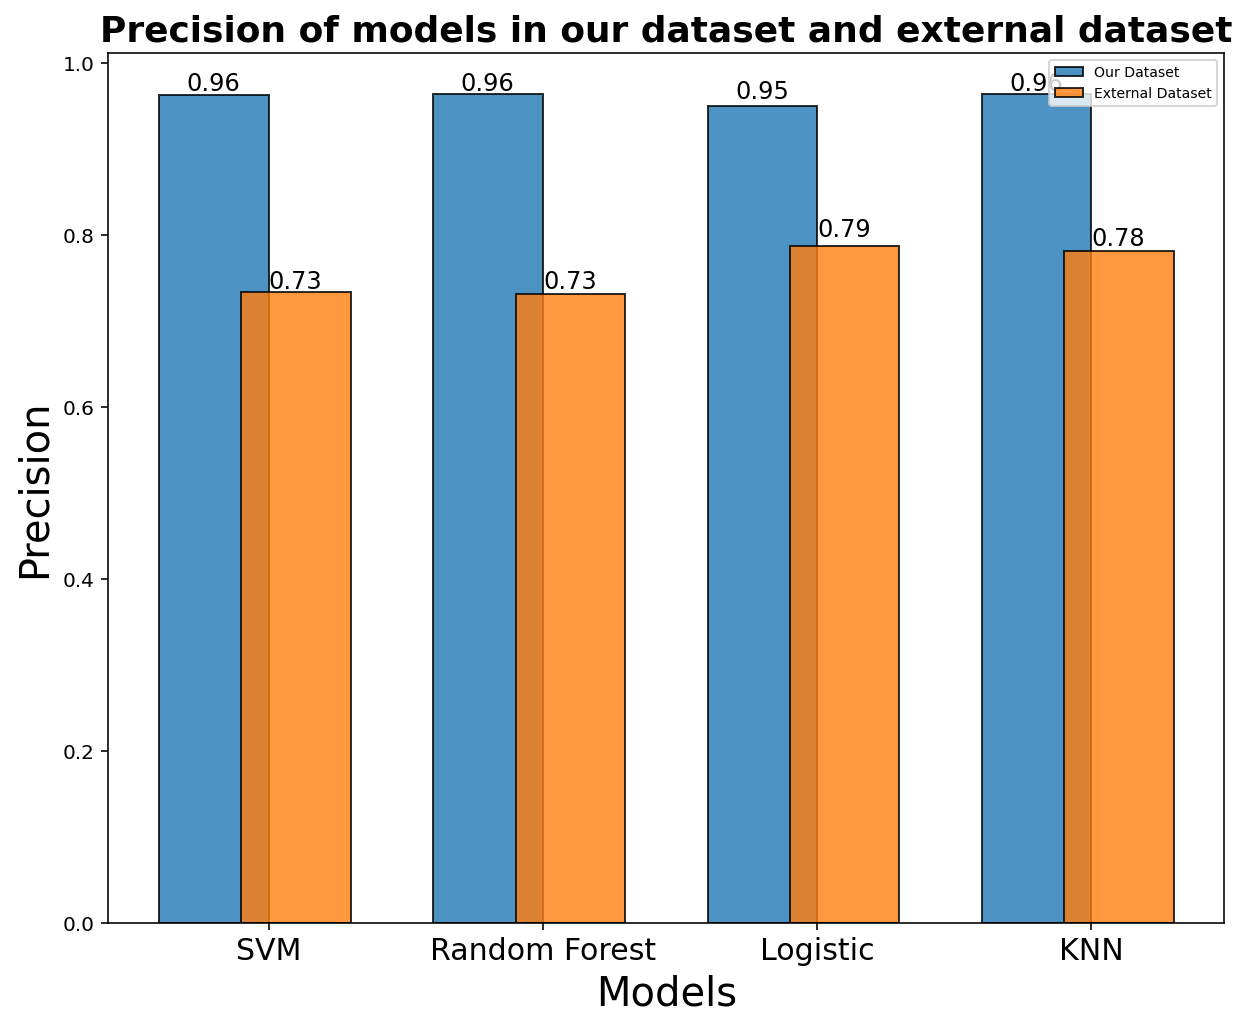

In [86]:
plt.figure(figsize=(10,8))
x = np.arange(4)
y1 = precision_our
y2 = precision_ls
width = 0.4
bar1 = plt.bar(x-0.4, height = y1, width = 0.4,  edgecolor='black', alpha = 0.8)
bar2 = plt.bar(x-0.1, height = y2, width = 0.4, edgecolor='black', alpha = 0.8)
for bar in bar1:
    yval = round(bar.get_height(),2)
    plt.text(bar.get_x()+0.1, yval+.008, yval, fontsize = 12)

for bar in bar2:
    yval = round(bar.get_height(),2)
    plt.text(bar.get_x()+0.1, yval+.008, yval, fontsize = 12)
plt.xticks(x-0.2,["SVM", "Random Forest", "Logistic", "KNN"], fontsize = 15)
plt.title("Precision of models in our dataset and external dataset",fontweight='bold', fontsize=18)
plt.ylabel("Precision", fontsize = 20)
plt.xlabel("Models", fontsize = 20)
plt.legend(["Our Dataset","External Dataset"],loc= "upper right",prop={'size': 7})

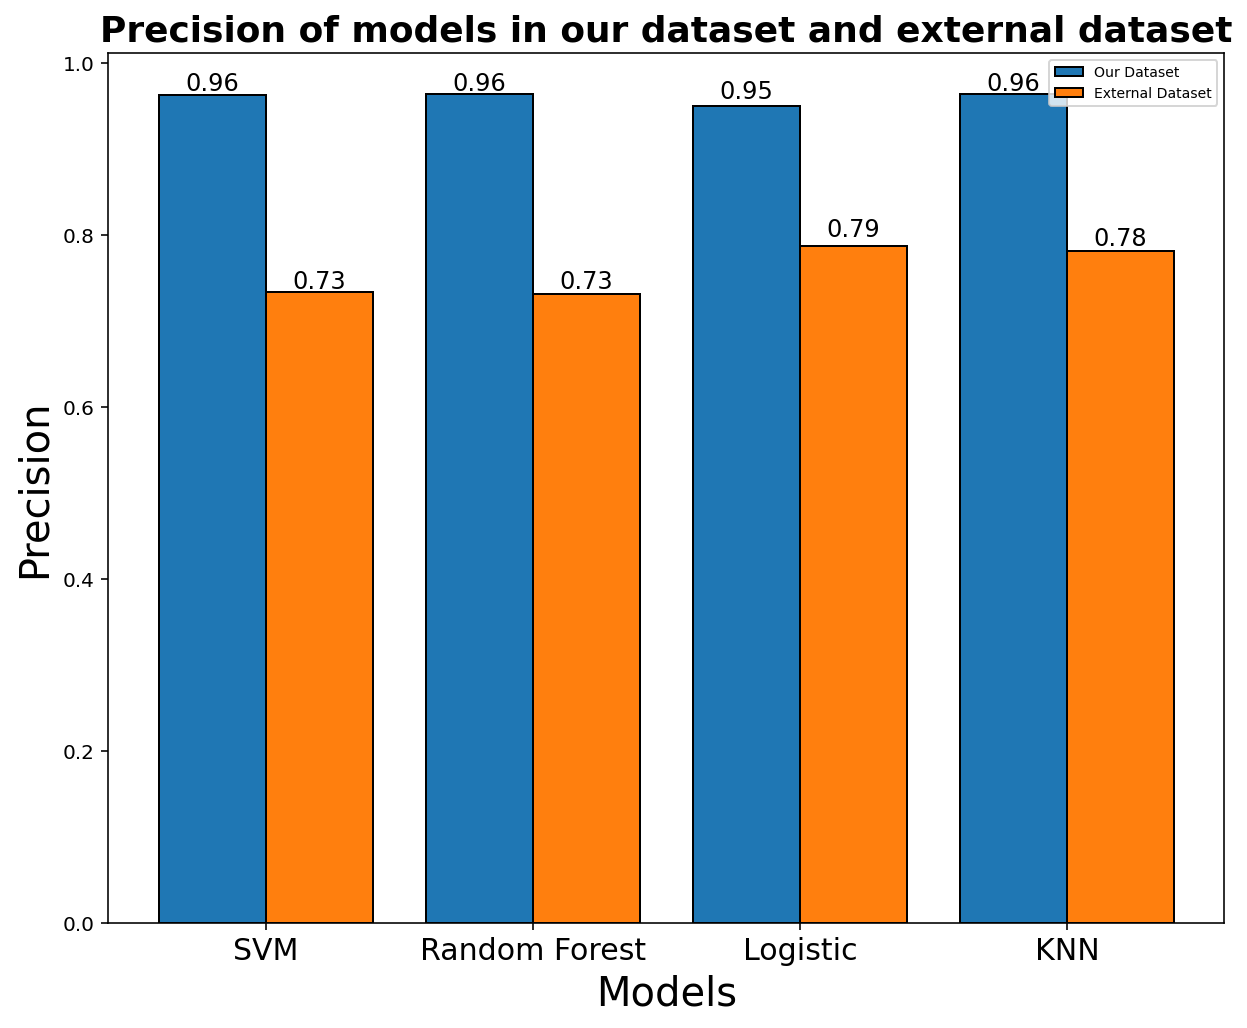

In [88]:
plt.figure(figsize=(10,8))
x = np.arange(4)
y1 = precision_our
y2 = precision_ls
width = 0.4
bar1 = plt.bar(x-0.4, height = y1, width = 0.4,  edgecolor='black')
bar2 = plt.bar(x, height = y2, width = 0.4, edgecolor='black')
for bar in bar1:
    yval = round(bar.get_height(),2)
    plt.text(bar.get_x()+0.1, yval+.008, yval, fontsize = 12)

for bar in bar2:
    yval = round(bar.get_height(),2)
    plt.text(bar.get_x()+0.1, yval+.008, yval, fontsize = 12)
plt.xticks(x-0.2,["SVM", "Random Forest", "Logistic", "KNN"], fontsize = 15)
plt.title("Precision of models in our dataset and external dataset",fontweight='bold', fontsize=18)
plt.ylabel("Precision", fontsize = 20)
plt.xlabel("Models", fontsize = 20)
plt.legend(["Our Dataset","External Dataset"],loc= "upper right",prop={'size': 7})